# Linear Regression - DIabetes Dataset 

In [66]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Reading the dataset

In [67]:
sns.set(style="whitegrid", context="notebook")
df = pd.read_csv("../data/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Handling missing values

In [68]:
df.iloc[:, 1:6] = df.iloc[:, 1:6].replace(to_replace=[0], value=np.nan)
df = df.apply(
    axis = "rows",
    func = lambda column: column.fillna(column.mean())
)

## Visualizing the dataset

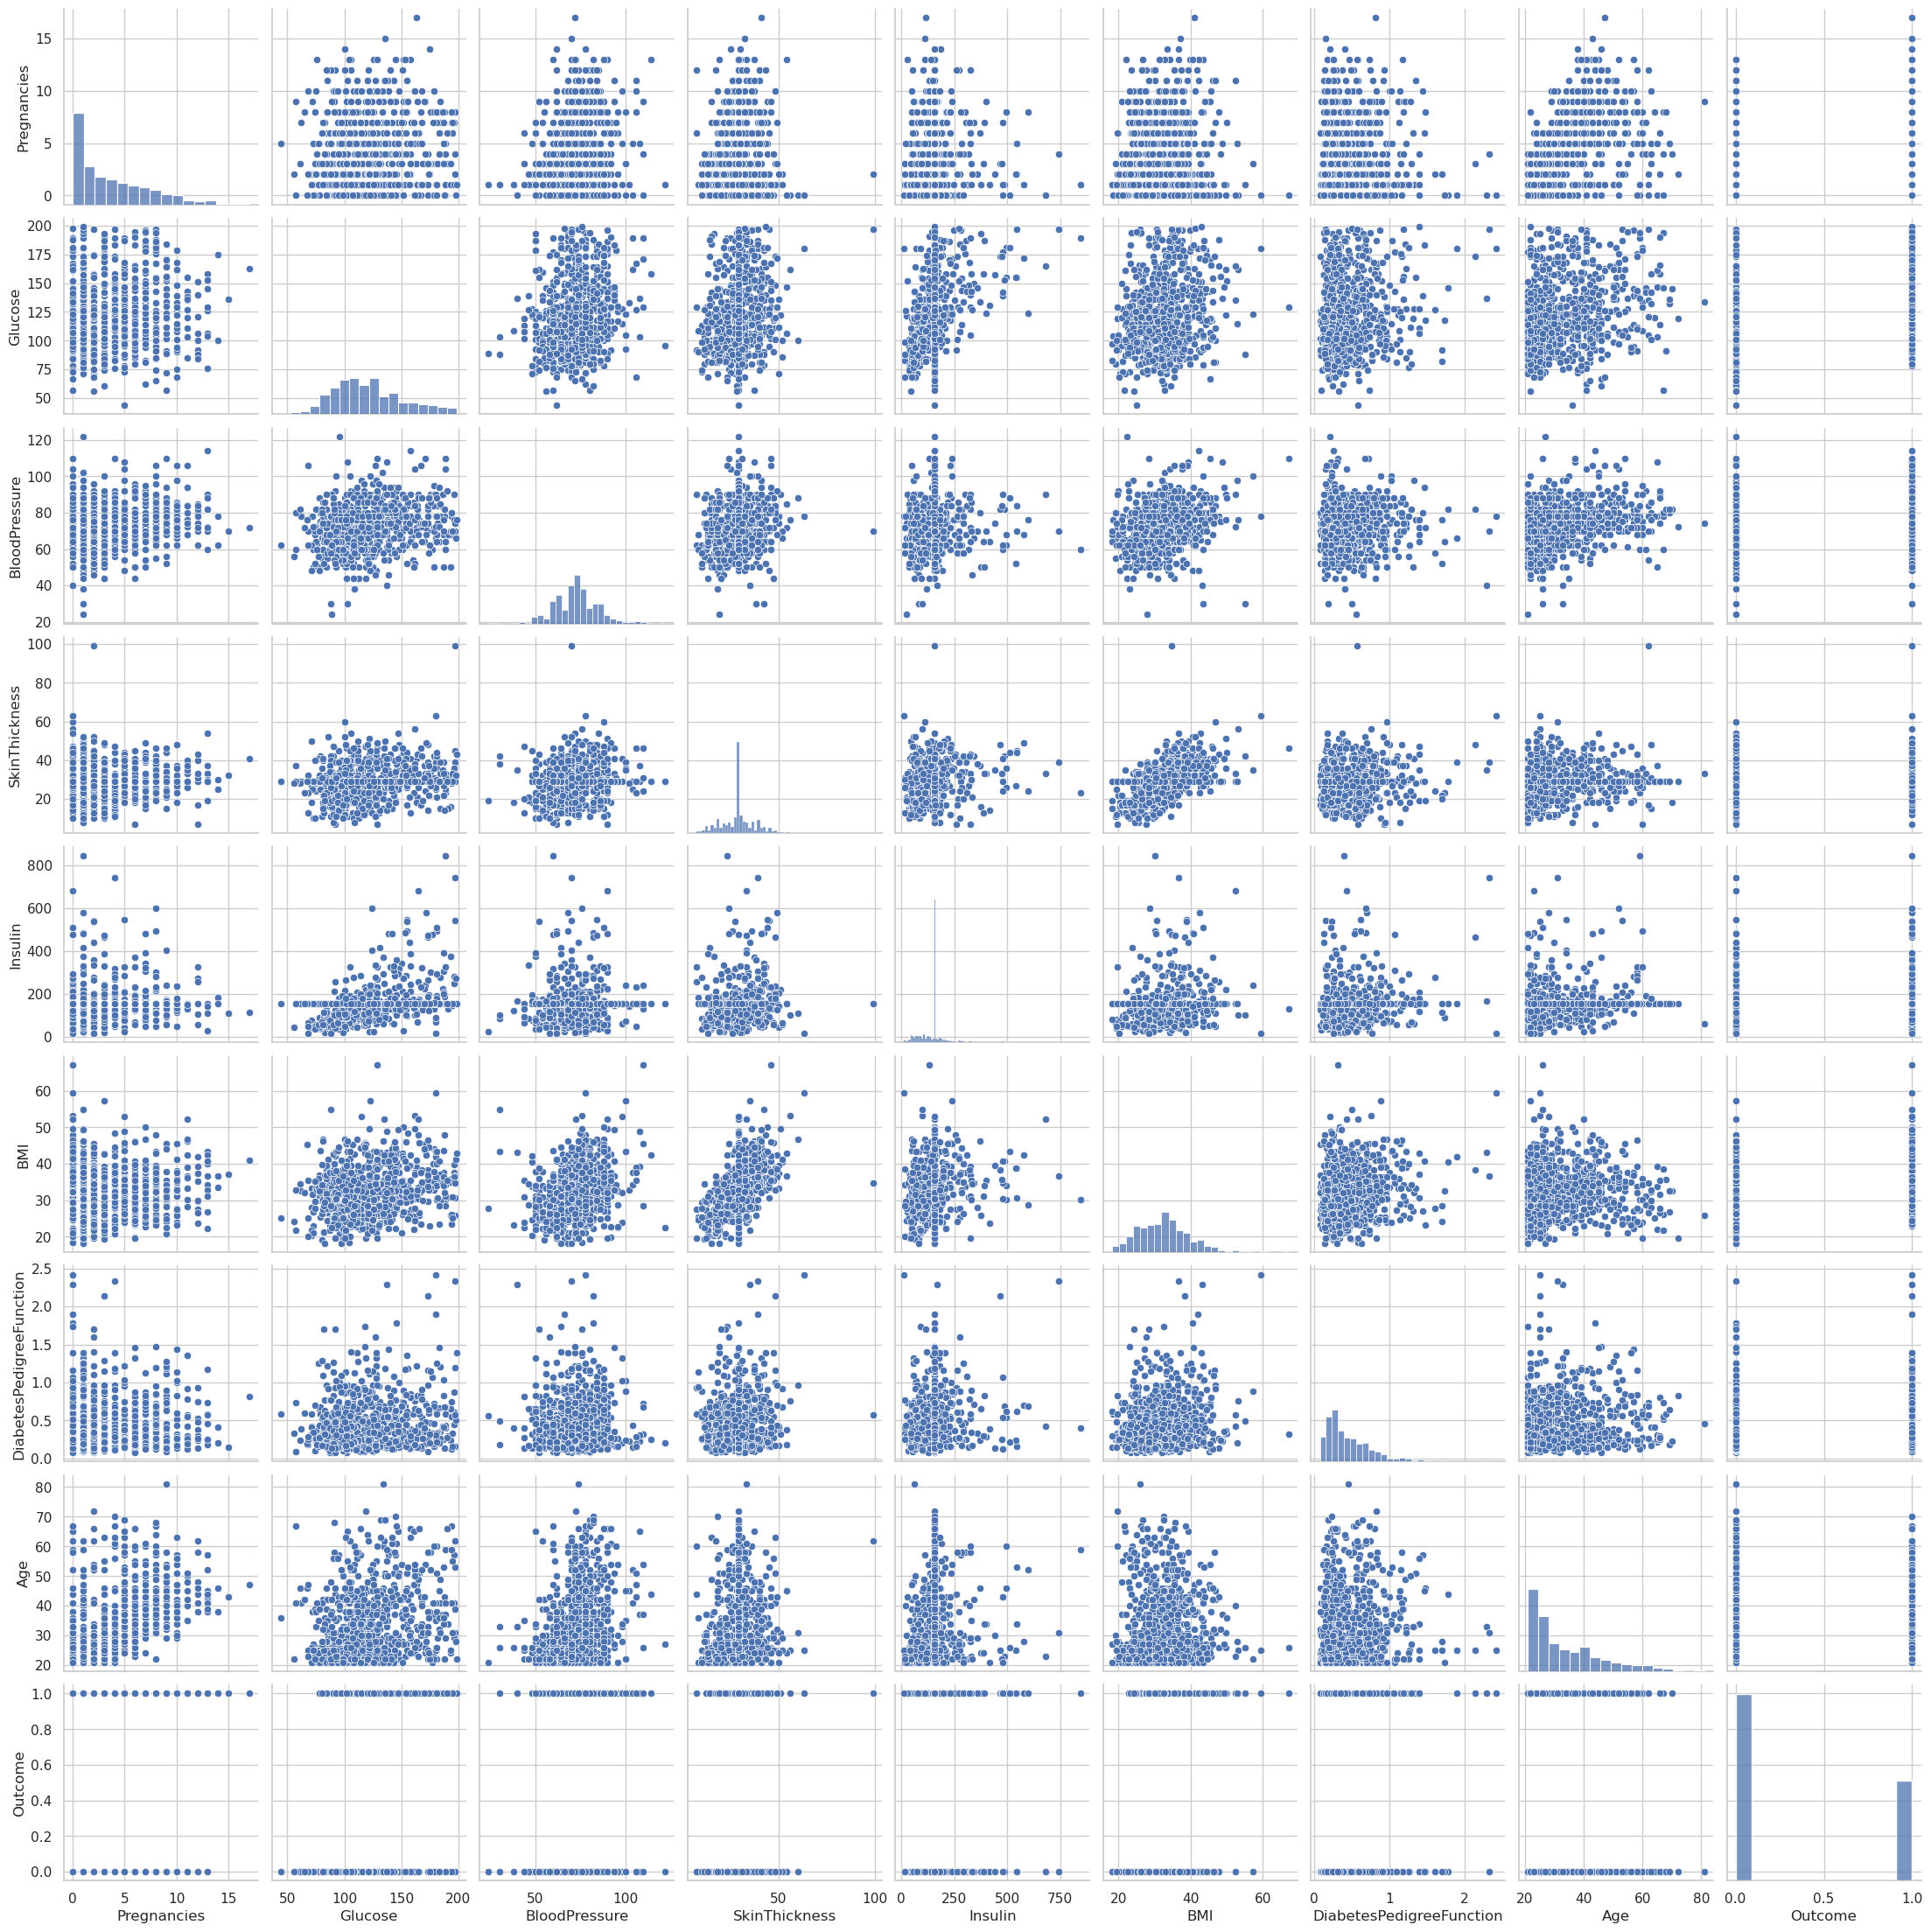

In [69]:
sns.pairplot(df)
plt.show()


## Looking for any correlation

In [70]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Axes: >

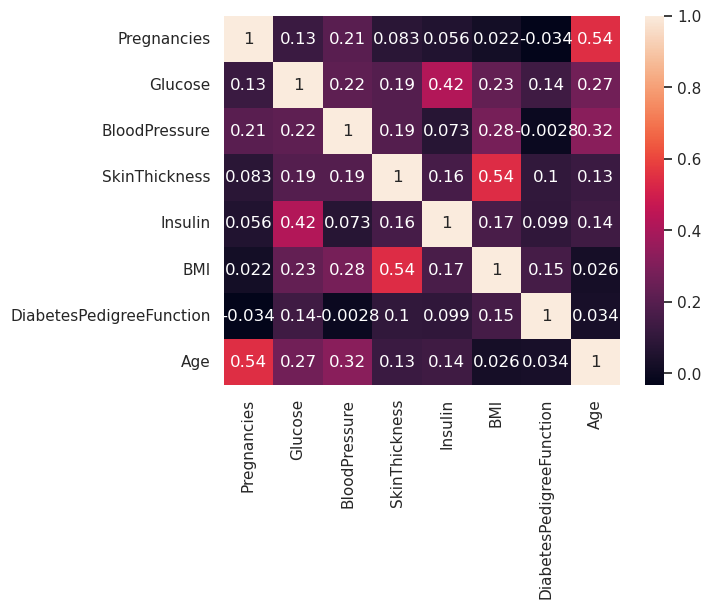

In [71]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
sns.heatmap(df[cols].corr(), annot=True, yticklabels=cols, xticklabels=cols)

## Creating and training the model

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [73]:
X_cols = list(set(df.columns)-set(['BMI']))
y_col = ['BMI']

X = df[X_cols].values
y = df[y_col].values

X_train, X_test, y_train, y_test = train_test_split(X,y)
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

## Measure prediction

In [74]:
import sklearn.metrics as metrics
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("r2 ", r2.round(4))
print("mse: ", mse.round(4))

r2  0.3999
mse:  0.4885


This measures tell us a very bad stimation

In [75]:
from regressors import stats
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)
y_test = y_test.reshape(-1)

print("==========Summary==========")
stats.summary(model, X_test, y_test, X_cols)

==========Summary==========
Residuals:
    Min      1Q  Median     3Q    Max
-2.3404 -0.4497  0.0634 0.4857 1.5365


Coefficients:
                          Estimate  Std. Error  t value   p value
_intercept                0.002232    0.050706   0.0440  0.964941
Age                      -0.116156    0.065414  -1.7757  0.077372
Glucose                   0.018239    0.060909   0.2994  0.764927
Outcome                   0.189766    0.059790   3.1739  0.001753
Pregnancies              -0.024375    0.063827  -0.3819  0.702966
Insulin                   0.043311    0.065768   0.6585  0.510984
DiabetesPedigreeFunction  0.060730    0.052786   1.1505  0.251376
BloodPressure             0.180564    0.056503   3.1956  0.001633
SkinThickness             0.475856    0.053780   8.8482  0.000000
---
R-squared:  0.39990,    Adjusted R-squared:  0.37367
F-statistic: 15.24 on 8 features


The R-squared and Adjusted R-squared values differs with a considered number. It means we need to delete some variables to create again the model with better results.

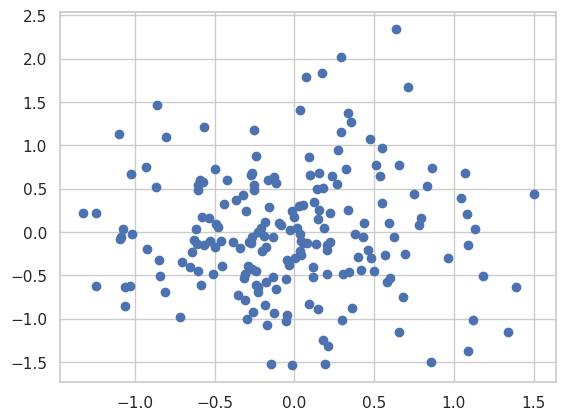

In [76]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.show()

The points are very far fromt he zero axis. Showing that the model is not working fine.

## Eliminate variables

In [77]:

X_cols = ['Age', 'Outcome', 'BloodPressure', 'SkinThickness']
y_col = ['BMI']

X = df[X_cols].values
y = df[y_col].values

X_train, X_test, y_train, y_test = train_test_split(X,y)
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [78]:
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("r2 ", r2.round(4))
print("mse: ", mse.round(4))

r2  0.3521
mse:  0.6062


In [79]:
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)
y_test = y_test.reshape(-1)

print("==========Summary==========")
stats.summary(model, X_test, y_test, X_cols)

==========Summary==========
Residuals:
    Min      1Q  Median     3Q    Max
-2.9659 -0.5146  0.1065 0.5161 1.5947


Coefficients:
               Estimate  Std. Error  t value   p value
_intercept     0.000407    0.056458   0.0072  0.994263
Age           -0.159862    0.064576  -2.4756  0.014173
Outcome        0.228324    0.060163   3.7951  0.000198
BloodPressure  0.221681    0.062930   3.5227  0.000534
SkinThickness  0.466376    0.059635   7.8205  0.000000
---
R-squared:  0.35210,    Adjusted R-squared:  0.33824
F-statistic: 25.41 on 4 features


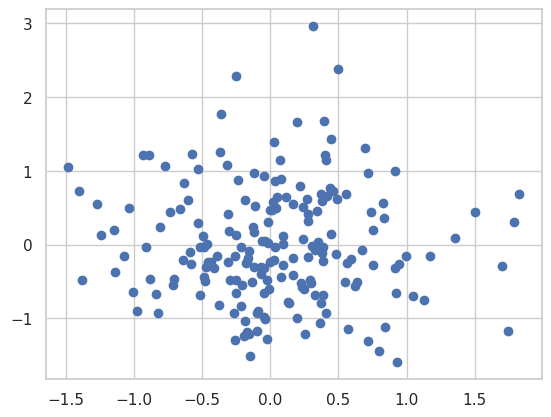

In [80]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.show()

Removing some variables, the model still have bad metrics and a bad score.
Let's keep removing variables 

In [81]:

X_cols = ['Outcome', 'BloodPressure', 'SkinThickness']
y_col = ['BMI']

X = df[X_cols].values
y = df[y_col].values

X_train, X_test, y_train, y_test = train_test_split(X,y)
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [82]:
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("r2 ", r2.round(4))
print("mse: ", mse.round(4))

r2  0.2688
mse:  0.6589


In [83]:
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)
y_test = y_test.reshape(-1)

print("==========Summary==========")
stats.summary(model, X_test, y_test, X_cols)

==========Summary==========
Residuals:
    Min      1Q  Median     3Q    Max
-2.5513 -0.4479  0.1493 0.6127 4.0319


Coefficients:
               Estimate  Std. Error  t value   p value
_intercept     0.025872    0.058822   0.4398  0.660550
Outcome        0.195257    0.062577   3.1203  0.002087
BloodPressure  0.156790    0.060123   2.6078  0.009833
SkinThickness  0.515307    0.055207   9.3341  0.000000
---
R-squared:  0.26880,    Adjusted R-squared:  0.25714
F-statistic: 23.04 on 3 features


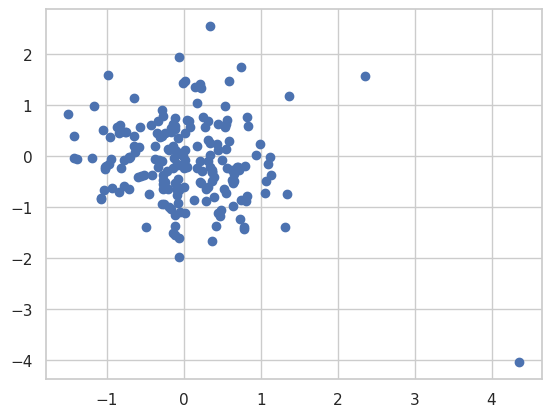

In [84]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.show()

As we can see in this graph, the residuals are more closer to the axis but the R-squared is still very low. If we look at the graph, it seems that a big value have a inaccurate value. Maybe there are some outliers values?

Let's do another model adding new variables:

In [85]:
df_2 = df.copy()
df_2['age2'] = df_2.Age ** 2
df_2['high_gluclose'] = (df_2.Glucose >= 100).astype(int)
df_2['high_blood_pressure'] = (df_2.BloodPressure >= 90).astype(int)
df_2['high_glucose_and_blood_pressure'] = df_2.high_gluclose * df_2.high_blood_pressure

In [90]:

X_cols = ['Age', 'Outcome', 'BloodPressure', 'SkinThickness', 'age2', 'high_gluclose', 'high_blood_pressure', 'high_glucose_and_blood_pressure']
y_col = ['BMI']

X = df_2[X_cols].values
y = df_2[y_col].values

X_train, X_test, y_train, y_test = train_test_split(X,y)
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [91]:
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("r2 ", r2.round(4))
print("mse: ", mse.round(4))

r2  0.3717
mse:  0.6824


In [92]:
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)
y_test = y_test.reshape(-1)

print("==========Summary==========")
stats.summary(model, X_test, y_test, X_cols)

==========Summary==========
Residuals:
    Min     1Q  Median     3Q    Max
-3.0407 -0.504 -0.0076 0.4681 1.7175


Coefficients:
                                 Estimate     Std. Error  t value   p value
_intercept                      -0.017054     499.625438  -0.0000  0.999973
Age                              0.172568       0.317969   0.5427  0.587956
Outcome                          0.171342       0.063846   2.6837  0.007921
BloodPressure                    0.209181       0.077519   2.6985  0.007590
SkinThickness                    0.461320       0.062316   7.4029  0.000000
age2                            -0.310914       0.321831  -0.9661  0.335227
high_gluclose                   -0.006785       0.067691  -0.1002  0.920267
high_blood_pressure             -0.095346  589486.885091  -0.0000  1.000000
high_glucose_and_blood_pressure  0.131454  535034.287537   0.0000  1.000000
---
R-squared:  0.37167,    Adjusted R-squared:  0.34421
F-statistic: 13.53 on 8 features


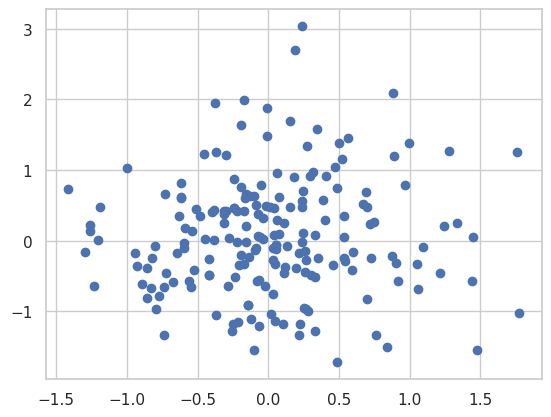

In [93]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.show()

The result is even worse. The conclusion is, with the actual values, no efficient linear regression model is capable of predict the BMI value with a high score.